In [15]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv('Churn_Modelling.csv')

In [25]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
df.shape

(10000, 14)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [28]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [29]:
df.duplicated().sum()

0

In [30]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [31]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [33]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [45]:
new_gg=pd.get_dummies(df[['Gender','Geography']],drop_first=True).astype(int)

In [46]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [49]:
new_df=pd.concat([df,new_gg],axis=1)

In [50]:
new_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [51]:
new_df.drop(columns=['Geography','Gender'],inplace=True)

In [52]:
new_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [53]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Gender_Male        10000 non-null  int32  
 10  Geography_Germany  10000 non-null  int32  
 11  Geography_Spain    10000 non-null  int32  
dtypes: float64(2), int32(3), int64(7)
memory usage: 820.4 KB


**Scale the values before training the model**

In [54]:
import sklearn

In [55]:
x=new_df.drop(columns=['Exited'])
y=new_df['Exited']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [59]:
print(len(x_train))
print(len(y_train))

8000
8000


In [60]:
print(len(x_test))
print(len(y_test))

2000
2000


In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [62]:
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [63]:
x_train_scale

array([[-0.23082038, -0.94449979, -0.70174202, ...,  0.91509065,
         1.71490137, -0.57273139],
       [-0.25150912, -0.94449979, -0.35520275, ..., -1.09278791,
        -0.58312392, -0.57273139],
       [-0.3963303 ,  0.77498705,  0.33787579, ..., -1.09278791,
         1.71490137, -0.57273139],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -1.09278791,
        -0.58312392, -0.57273139],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -1.09278791,
        -0.58312392, -0.57273139],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  0.91509065,
         1.71490137, -0.57273139]])

## Tensorflow

In [88]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [89]:
model = Sequential()
model.add(Dense(6, activation='relu', input_dim=11))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\MR OSMAN\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [90]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 6)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [91]:
# model loss and weights
model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [99]:
history = model.fit(x_train_scale,y_train, epochs=50)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8571 - loss: 0.3343
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8613 - loss: 0.3342
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8620 - loss: 0.3281
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8650 - loss: 0.3287
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8642 - loss: 0.3264
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8644 - loss: 0.3329
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8661 - loss: 0.3277
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8662 - loss: 0.3299
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8646 - loss: 0.3281
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8589 - loss: 0.3320
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8606 - loss: 0.3358
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [100]:
model.layers[0].get_weights()

[array([[ 0.02243486,  0.33692873,  0.01293452,  0.05593053, -0.01774238,
          0.15586485],
        [-0.37293747, -0.49303854, -1.0688624 , -0.9584828 , -0.12157527,
         -0.39015773],
        [-0.12498169,  0.22953856,  0.00313951, -0.24749215, -0.02166957,
         -0.0584382 ],
        [ 0.11743555, -1.3716496 ,  0.00656665,  0.00510844,  0.18424542,
         -0.12174612],
        [-1.0460328 , -0.23986378, -0.07383836,  0.18945895,  1.0967156 ,
          0.8662246 ],
        [-0.10714213, -0.15286075,  0.04679603, -0.3149385 , -0.04833344,
         -0.17783797],
        [-0.660454  ,  0.06603331, -0.35940593, -0.9058138 , -0.5047806 ,
          0.04101511],
        [ 0.00632615,  0.14900129, -0.0686924 , -0.02492563,  0.00948541,
          0.09334013],
        [-0.06591222, -0.15872785,  0.02168671, -0.19913362, -0.17260104,
          0.04898325],
        [ 0.22024281, -0.11399032, -0.11702073,  0.33590105, -0.05596015,
         -0.10062043],
        [-0.04424411,  0.03399

In [101]:
np_log=model.predict(x_test_scale)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [102]:
y_pred=np.where(np_log>0.5,1,0)

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8685

In [104]:
import matplotlib.pyplot as plt

In [105]:
history.history

{'accuracy': [0.8637499809265137,
  0.8640000224113464,
  0.8622499704360962,
  0.8619999885559082,
  0.8619999885559082,
  0.8619999885559082,
  0.8638749718666077,
  0.8641250133514404,
  0.8629999756813049,
  0.8615000247955322,
  0.862625002861023,
  0.862625002861023,
  0.8615000247955322,
  0.8631250262260437,
  0.8641250133514404,
  0.8644999861717224,
  0.8619999885559082,
  0.8631250262260437,
  0.8638749718666077,
  0.8631250262260437,
  0.862375020980835,
  0.8641250133514404,
  0.8615000247955322,
  0.8627499938011169,
  0.8632500171661377,
  0.8632500171661377,
  0.8633750081062317,
  0.8628749847412109,
  0.8643749952316284,
  0.8642500042915344,
  0.8637499809265137,
  0.8637499809265137,
  0.8640000224113464,
  0.8631250262260437,
  0.8638749718666077,
  0.8643749952316284,
  0.8638749718666077,
  0.8642500042915344,
  0.8638749718666077,
  0.8633750081062317,
  0.8636249899864197,
  0.8631250262260437,
  0.8631250262260437,
  0.8633750081062317,
  0.8631250262260437,
 

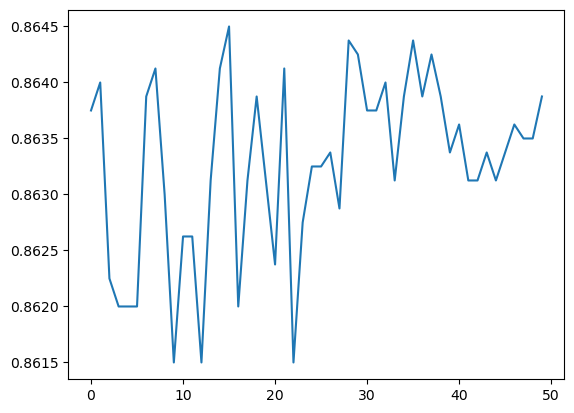

In [108]:
plt.plot(history.history['accuracy'])

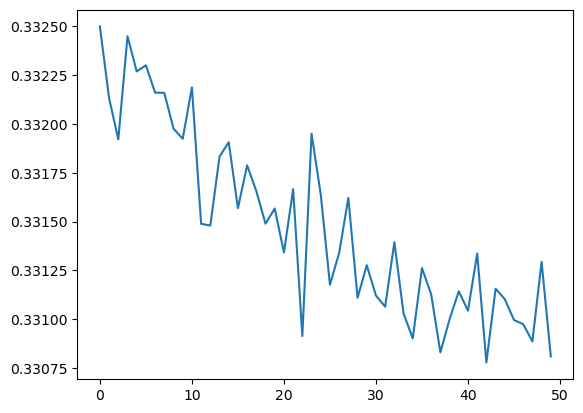

In [109]:
plt.plot(history.history['loss'])

**This shows our loss is improved**